In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
df=pd.read_csv("AppleStockPrices.csv")
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.100600,0.101037,0.100600,0.100600,469033600,0.0,0.0
1,1980-12-15,0.095789,0.095789,0.095352,0.095352,175884800,0.0,0.0
2,1980-12-16,0.088790,0.088790,0.088353,0.088353,105728000,0.0,0.0
3,1980-12-17,0.090540,0.090977,0.090540,0.090540,86441600,0.0,0.0
4,1980-12-18,0.093165,0.093602,0.093165,0.093165,73449600,0.0,0.0


In [3]:
df.isna().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [4]:
df.shape

(10274, 8)

In [5]:
df.dtypes

Date             object
Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

In [6]:
df['Date']=pd.to_datetime(df['Date'])

In [7]:
df.dtypes

Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Volume                   int64
Dividends              float64
Stock Splits           float64
dtype: object

In [8]:
df.set_index('Date',inplace=True)

In [9]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12,0.100600,0.101037,0.100600,0.100600,469033600,0.0,0.0
1980-12-15,0.095789,0.095789,0.095352,0.095352,175884800,0.0,0.0
1980-12-16,0.088790,0.088790,0.088353,0.088353,105728000,0.0,0.0
1980-12-17,0.090540,0.090977,0.090540,0.090540,86441600,0.0,0.0
1980-12-18,0.093165,0.093602,0.093165,0.093165,73449600,0.0,0.0


In [10]:
df[['Dividends','Stock Splits']].value_counts()

Dividends  Stock Splits
0.000000   0.0             10197
0.001071   0.0                21
0.142500   0.0                 4
0.205000   0.0                 4
0.192500   0.0                 4
0.182500   0.0                 4
0.000714   0.0                 4
0.000893   0.0                 4
0.000982   0.0                 4
0.157500   0.0                 4
0.108929   0.0                 4
0.117500   0.0                 4
0.130000   0.0                 4
0.094643   0.0                 3
0.000000   2.0                 3
0.000536   0.0                 2
0.220000   0.0                 2
0.000000   7.0                 1
           4.0                 1
dtype: int64

In [11]:
df=df.drop(['Dividends','Stock Splits'],axis='columns')

In [12]:
scaler=MinMaxScaler()
scaled_values=scaler.fit_transform(df[df.columns])

In [13]:
scaled_values

array([[3.92964677e-04, 3.95046699e-04, 4.02391015e-04, 3.96482993e-04,
        6.31981003e-02],
       [3.62309760e-04, 3.61664514e-04, 3.68388220e-04, 3.62979437e-04,
        2.36989104e-02],
       [3.17715971e-04, 3.17150143e-04, 3.23046317e-04, 3.18303257e-04,
        1.42459064e-02],
       ...,
       [1.00000000e+00, 9.98600689e-01, 9.97343702e-01, 9.89913906e-01,
        1.00274592e-02],
       [9.90506053e-01, 9.92685497e-01, 9.97149348e-01, 9.83275009e-01,
        7.72143271e-03],
       [9.87383827e-01, 9.88678370e-01, 9.63136075e-01, 9.50718629e-01,
        1.89508498e-02]])

In [14]:
scaled_df=pd.DataFrame(scaled_values,columns=df.columns,index=df.index)

In [15]:
scaled_df.head()

,Open,High,Low,Close,Volume
Date,,,,,
1980-12-12,0.000393,0.000395,0.000402,0.000396,0.063198
1980-12-15,0.000362,0.000362,0.000368,0.000363,0.023699
1980-12-16,0.000318,0.000317,0.000323,0.000318,0.014246
1980-12-17,0.000329,0.000331,0.000337,0.000332,0.011647
1980-12-18,0.000346,0.000348,0.000354,0.000349,0.009897


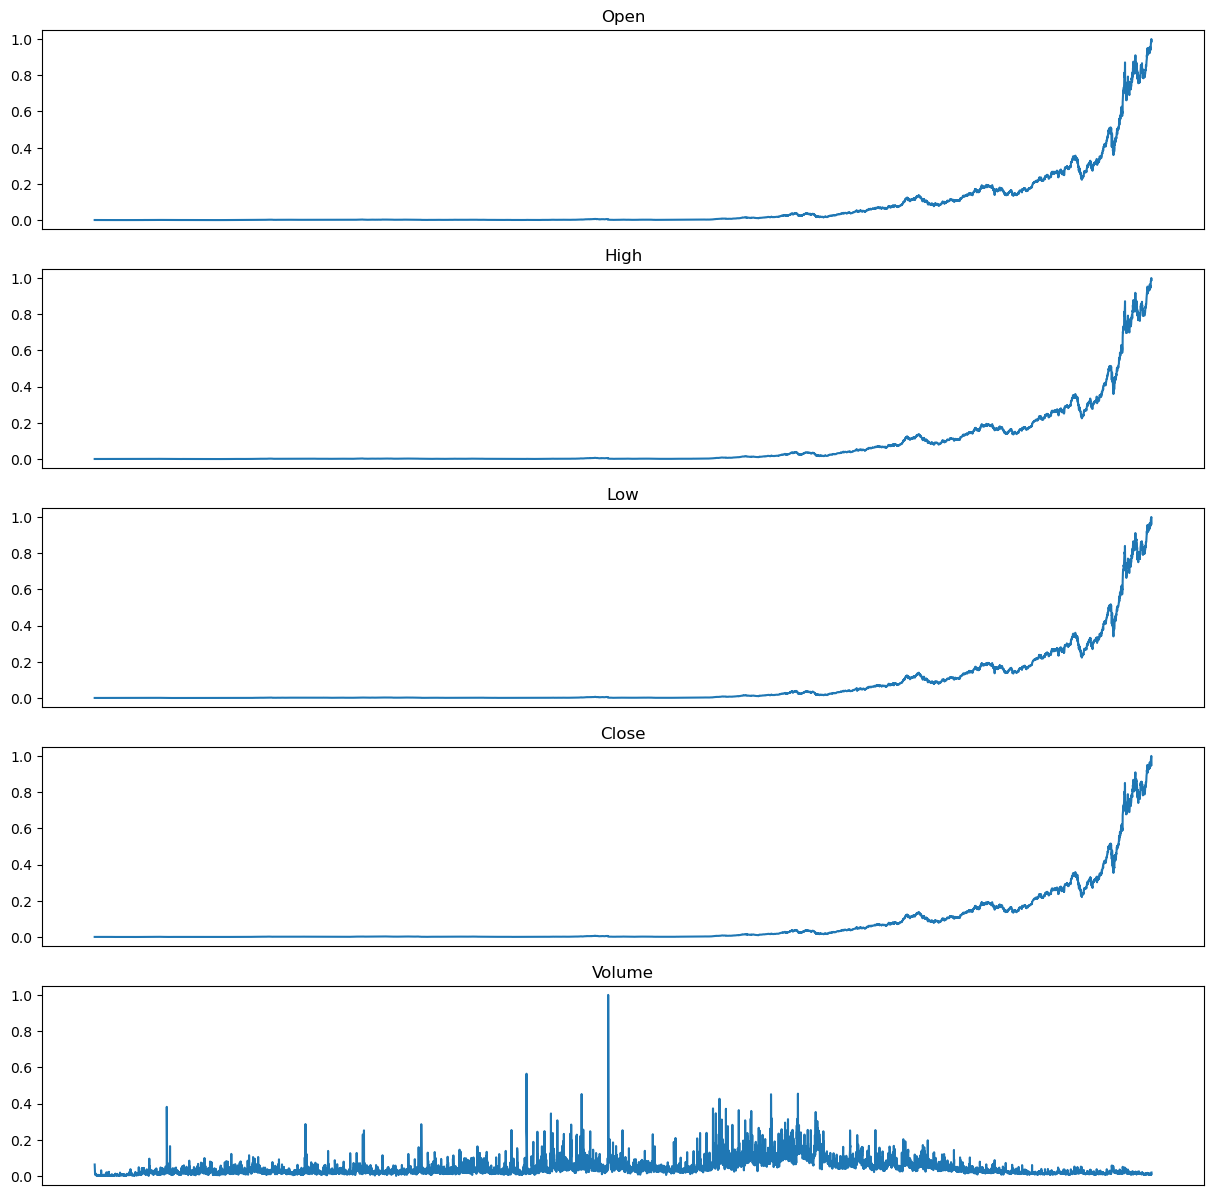

In [16]:
plt.rcParams['figure.figsize']=(15,15)
fig,axes=plt.subplots(5)

for ax, col in zip(axes, scaled_df.columns):
    ax.plot(scaled_df[col])
    ax.set_title(col)
    ax.axes.xaxis.set_visible(False)

In [17]:
def create_sequence(data, window_size):
    X=[]
    y=[]
    for i in range(window_size, len(data)):
        X.append(data.iloc[i-window_size:i].values)
        y.append(data.iloc[i].values)
    return np.array(X), np.array(y)

In [18]:
window_size=60
X,y=create_sequence(scaled_df, window_size)

In [19]:
X

array([[[3.92964677e-04, 3.95046699e-04, 4.02391015e-04, 3.96482993e-04,
         6.31981003e-02],
        [3.62309760e-04, 3.61664514e-04, 3.68388220e-04, 3.62979437e-04,
         2.36989104e-02],
        [3.17715971e-04, 3.17150143e-04, 3.23046317e-04, 3.18303257e-04,
         1.42459064e-02],
        ...,
        [3.28863304e-04, 3.28277623e-04, 3.31547088e-04, 3.26679218e-04,
         1.56342786e-03],
        [2.81487425e-04, 2.80986117e-04, 2.86209964e-04, 2.82007746e-04,
         2.06444914e-03],
        [2.56401205e-04, 2.55944574e-04, 2.60702872e-04, 2.56875157e-04,
         3.82406004e-03]],

       [[3.62309760e-04, 3.61664514e-04, 3.68388220e-04, 3.62979437e-04,
         2.36989104e-02],
        [3.17715971e-04, 3.17150143e-04, 3.23046317e-04, 3.18303257e-04,
         1.42459064e-02],
        [3.28863297e-04, 3.31059479e-04, 3.37214205e-04, 3.32263128e-04,
         1.16472357e-02],
        ...,
        [2.81487425e-04, 2.80986117e-04, 2.86209964e-04, 2.82007746e-04,
        

In [20]:
X.shape,y.shape

((10214, 60, 5), (10214, 5))

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((8171, 60, 5), (2043, 60, 5))

In [22]:
model=keras.Sequential([
    #adding the first LSTM layer
    keras.layers.LSTM(units=50,return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    keras.layers.Dropout(0.3),
    
    #adding the second LSTM layer
    keras.layers.LSTM(units=50,return_sequences=True),
    keras.layers.Dropout(0.3),
    
    #adding the third LSTM layer
    keras.layers.LSTM(units=50,return_sequences=False),
    keras.layers.Dropout(0.3),
    
    # adding output layer
    keras.layers.Dense(y_train.shape[1])
])

C:\Users\yasha\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
#  Compilation
model.compile(optimizer='adam',
             loss='mean_squared_error',
             metrics=['RootMeanSquaredError'])

In [24]:
# early stopping
early_stopping=EarlyStopping(monitor='val_loss',
                            patience=10,
                            restore_best_weights=True)

In [25]:
lstm_model=model.fit(X_train,y_train,
                    validation_split=0.2,
                    epochs=5,
                    batch_size=3,
                    callbacks=[early_stopping])

Epoch 1/5
2179/2179 ━━━━━━━━━━━━━━━━━━━━ 105s 47ms/step - RootMeanSquaredError: 0.0510 - loss: 0.0027 - val_RootMeanSquaredError: 0.0471 - val_loss: 0.0022
Epoch 2/5
2179/2179 ━━━━━━━━━━━━━━━━━━━━ 89s 41ms/step - RootMeanSquaredError: 0.0335 - loss: 0.0011 - val_RootMeanSquaredError: 0.0219 - val_loss: 4.8069e-04
Epoch 3/5
2179/2179 ━━━━━━━━━━━━━━━━━━━━ 86s 40ms/step - RootMeanSquaredError: 0.0304 - loss: 9.2512e-04 - val_RootMeanSquaredError: 0.0238 - val_loss: 5.6439e-04
Epoch 4/5
2179/2179 ━━━━━━━━━━━━━━━━━━━━ 87s 40ms/step - RootMeanSquaredError: 0.0296 - loss: 8.8309e-04 - val_RootMeanSquaredError: 0.0221 - val_loss: 4.8636e-04
Epoch 5/5
2179/2179 ━━━━━━━━━━━━━━━━━━━━ 96s 44ms/step - RootMeanSquaredError: 0.0277 - loss: 7.6982e-04 - val_RootMeanSquaredError: 0.0218 - val_loss: 4.7729e-04


In [27]:
lstm_model.history

{'RootMeanSquaredError': [0.04210282862186432,
  0.03290635347366333,
  0.03131762146949768,
  0.02924344316124916,
  0.02920103818178177],
 'loss': [0.001772648305632174,
  0.0010828280355781317,
  0.0009807934984564781,
  0.000855178979691118,
  0.0008527006139047444],
 'val_RootMeanSquaredError': [0.04714483022689819,
  0.021924704313278198,
  0.023756887763738632,
  0.022053563967347145,
  0.02184695564210415],
 'val_loss': [0.0022226348519325256,
  0.0004806926881428808,
  0.0005643896874971688,
  0.00048635966959409416,
  0.00047728943172842264]}

In [28]:
predictions=model.predict(X_test)

64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step


In [29]:
predictions[:10]

array([[0.00894436, 0.00924693, 0.00969896, 0.0091481 , 0.0509885 ],
       [0.0087163 , 0.00870297, 0.00915248, 0.00874842, 0.0804609 ],
       [0.00993994, 0.01002616, 0.01044641, 0.01003752, 0.10365141],
       [0.00722989, 0.00744681, 0.00791503, 0.0073313 , 0.03846432],
       [0.00858772, 0.00882711, 0.00928455, 0.00875299, 0.04621904],
       [0.01258121, 0.01302665, 0.01343194, 0.01291879, 0.0691945 ],
       [0.00875762, 0.00908282, 0.00953966, 0.00896027, 0.05412251],
       [0.00758296, 0.00779345, 0.00826885, 0.00773918, 0.05252758],
       [0.21587133, 0.221809  , 0.2194243 , 0.22316918, 0.03305589],
       [0.00691245, 0.00708145, 0.00755852, 0.00700544, 0.04067645]],
      dtype=float32)

In [30]:
# inverse scaling
predictions=scaler.inverse_transform(predictions)
y_test_rescaled=scaler.inverse_transform(y_test)

In [31]:
predictions[:10]

array([[1.4426656e+00, 1.4927400e+00, 1.5355402e+00, 1.4715538e+00,
        3.7841834e+08],
       [1.4068732e+00, 1.4072181e+00, 1.4511894e+00, 1.4089435e+00,
        5.9715187e+08],
       [1.5989125e+00, 1.6152508e+00, 1.6509101e+00, 1.6108829e+00,
        7.6926355e+08],
       [1.1735951e+00, 1.2097234e+00, 1.2601880e+00, 1.1869491e+00,
        2.8546832e+08],
       [1.3866935e+00, 1.4267346e+00, 1.4715744e+00, 1.4096590e+00,
        3.4302115e+08],
       [2.0134370e+00, 2.0869923e+00, 2.1117311e+00, 2.0622377e+00,
        5.1353674e+08],
       [1.4133582e+00, 1.4669378e+00, 1.5109519e+00, 1.4421301e+00,
        4.0167782e+08],
       [1.2290061e+00, 1.2642220e+00, 1.3147995e+00, 1.2508445e+00,
        3.8984083e+08],
       [3.3918007e+01, 3.4911976e+01, 3.3906963e+01, 3.4998280e+01,
        2.4532891e+08],
       [1.1237746e+00, 1.1522808e+00, 1.2051601e+00, 1.1359029e+00,
        3.0188598e+08]], dtype=float32)

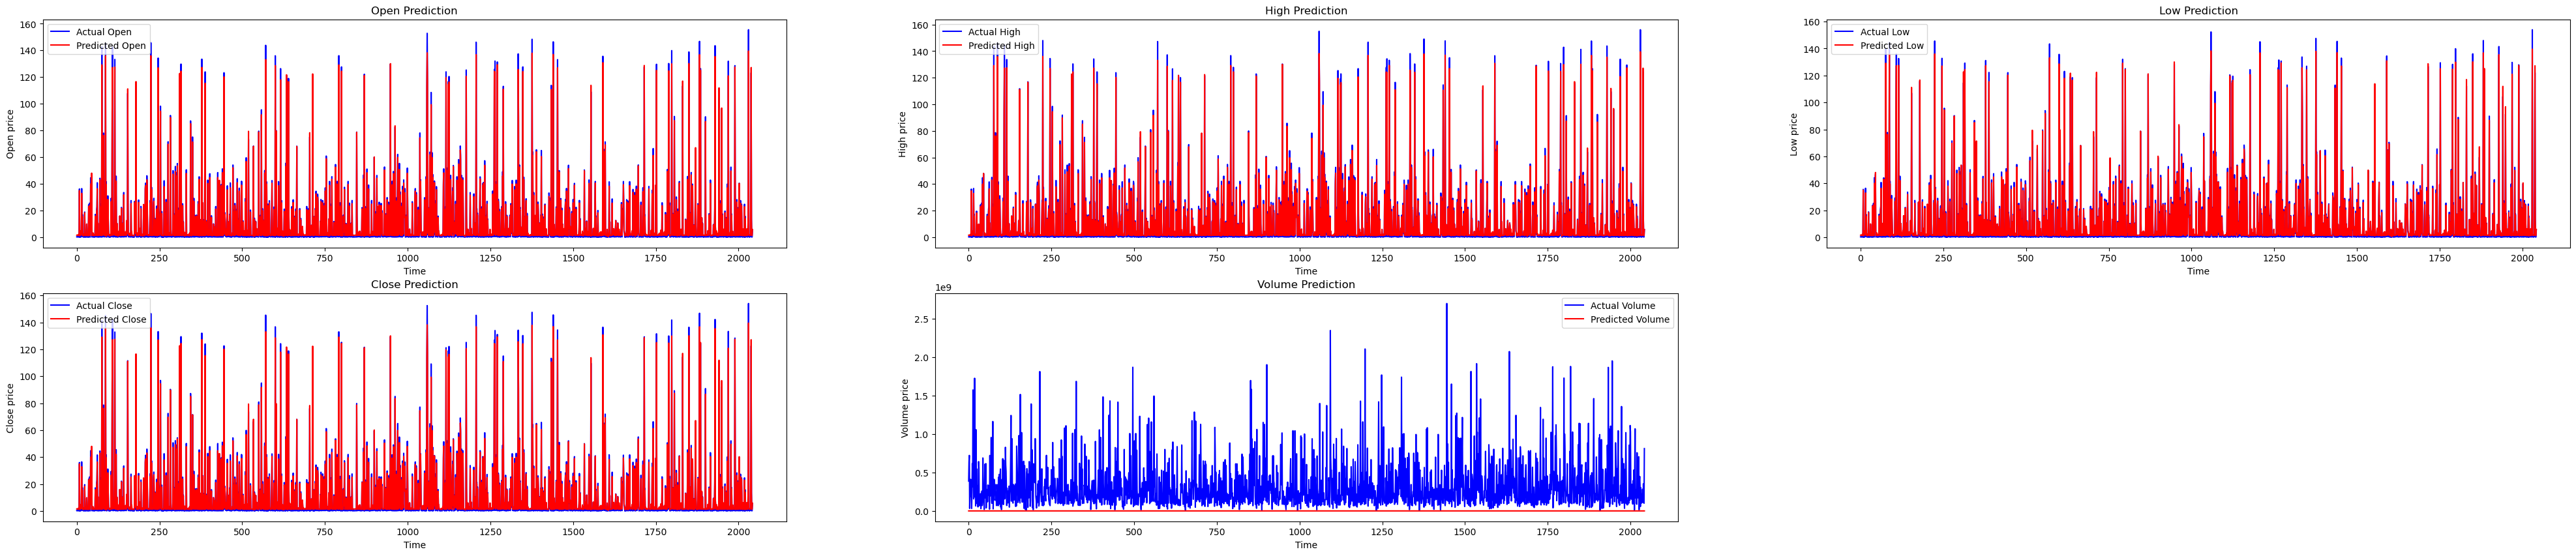

In [42]:
plt.rcParams['figure.figsize']=(50,10)

for i,col in enumerate( scaled_df.columns):
    plt.subplot(2,3,i+1)
    plt.plot(y_test_rescaled[:,i],color='blue',label= f'Actual {col}')
    plt.plot(predictions[:,1], color='red',label= f'Predicted {col}')
    plt.title(f'{col} Prediction')
    plt.xlabel('Time')
    plt.ylabel(f'{col} price')
    plt.legend()